In [5]:
# Load Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

plt.style.use('seaborn')
sns.set(font_scale=2.5)

In [6]:
df_train = pd.read_csv('./practice/prac_dataset/train.csv')
df_test = pd.read_csv('./practice/prac_dataset/test.csv')

In [7]:
train = df_train.drop(['Cabin', 'Embarked', 'Name', 'Ticket', 'PassengerId'],axis=1)
test = df_test.drop(['Cabin', 'Embarked', 'Name', 'Ticket'],axis=1)
train["Age"].fillna(train.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Age"].fillna(test.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Fare"].fillna(test.groupby("Sex")["Fare"].transform("median"), inplace=True)
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)
age_mean = train['Age'].mean()
age_std = train['Age'].std()
indexNames = train[train['Age'] < age_mean - 3*age_std].index
train.drop(indexNames , inplace=True)
indexNames = train[train['Age'] > age_mean + 3*age_std].index
train.drop(indexNames , inplace=True)
fare_mean = train['Fare'].mean()
fare_std = train['Fare'].std()
indexNames = train[train['Fare'] < fare_mean - 3*fare_std].index
train.drop(indexNames , inplace=True)
indexNames = train[train['Fare'] > fare_mean + 3*fare_std].index
train.drop(indexNames , inplace=True)

In [8]:
X_train = train.drop('Survived', axis=1).values
target_label = train['Survived'].values
X_test = test.values

In [9]:
X_train.shape, X_test.shape

((864, 6), (418, 7))

In [28]:
X_tr, X_vld, Y_tr, Y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2020)
Y_tr.shape, Y_vld.shape

((691,), (173,))

In [29]:
model = LogisticRegression()
model.fit(X_tr, Y_tr)
prediction = model.predict(X_vld)

In [30]:
prediction

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [31]:
print(f'Number of people: {Y_vld.shape[0]}\naccuracy: {100*accuracy_score(Y_vld, prediction):.2f}%',)

Number of people: 173
accuracy: 78.03%


In [32]:
confusion_matrix(Y_vld, prediction)

array([[94, 24],
       [14, 41]], dtype=int64)

In [33]:
print(f'Precision: {100*precision_score(Y_vld, prediction):.2f}%')
print(f'Recall: {100*recall_score(Y_vld, prediction):.2f}%')
print(f'F1-score: {100*f1_score(Y_vld, prediction):.2f}%')

Precision: 63.08%
Recall: 74.55%
F1-score: 68.33%


In [37]:
# cut off 조절에 따른 모델의 성능을 평가해 보기 위해 
# cut off 값을 다양하게 선택 ~ Hyper parameter 조정
tmp_list = []
for i in np.linspace(0, 1, 100):
    pred = model.predict_proba(X_vld)[: ,1] > i
    cf_mtx = confusion_matrix(Y_vld, pred)
    acc = accuracy_score(Y_vld, pred)
    tpr = cf_mtx[0, 0] / cf_mtx[0].sum()
    fpr = cf_mtx[1, 0] / cf_mtx[1].sum()
    f1 = f1_score(Y_vld, pred)
    tmp_list.append([i, acc, f1, tpr, fpr])
    
cut_off = pd.DataFrame(tmp_list)
cut_off.columns = ['CUTOFF', 'ACC','F1', 'TPR', 'FPR']
cut_off

,CUTOFF,ACC,F1,TPR,FPR
0,0.000000,0.317919,0.482456,0.000000,0.000000
1,0.010101,0.323699,0.484581,0.008475,0.000000
2,0.020202,0.323699,0.484581,0.008475,0.000000
3,0.030303,0.329480,0.486726,0.016949,0.000000
4,0.040404,0.329480,0.486726,0.016949,0.000000
...,...,...,...,...,...
95,0.959596,0.687861,0.100000,0.983051,0.945455
96,0.969697,0.687861,0.100000,0.983051,0.945455
97,0.979798,0.676301,0.034483,0.983051,0.981818
98,0.989899,0.676301,0.000000,0.991525,1.000000


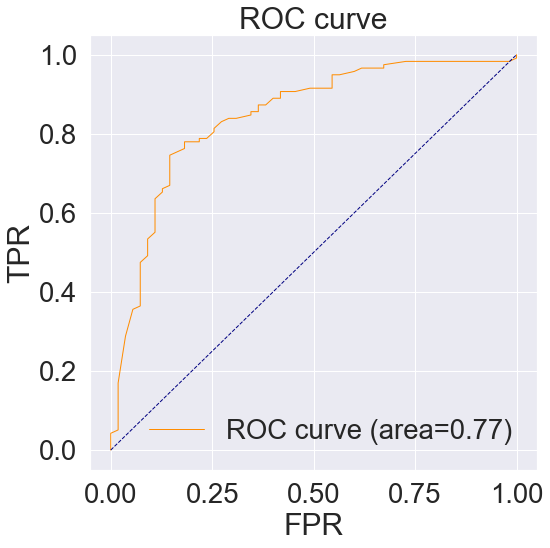

In [49]:
fpr, tpr, thresholds = roc_curve(Y_vld, prediction)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,8))
plt.plot(cut_off["FPR"],cut_off["TPR"], color="darkorange", lw=1, label="ROC curve (area=%.2f)" %roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")

In [39]:
cut_off[cut_off["ACC"] == cut_off["ACC"].max()] #accuracy가 최대인 값

,CUTOFF,ACC,F1,TPR,FPR
70,0.707071,0.803468,0.653061,0.90678,0.418182


In [40]:
cut_off_ACC_MAX = cut_off[cut_off["ACC"] == cut_off["ACC"].max()]["CUTOFF"][70]
cut_off_ACC_MAX

0.7070707070707072

In [41]:
pred_ACC_MAX = model.predict_proba(X_vld)[:,1] > cut_off_ACC_MAX

In [43]:
confusion_matrix(Y_vld,pred_ACC_MAX)

array([[107,  11],
       [ 23,  32]], dtype=int64)

In [51]:
print(f'Precision: {100*precision_score(Y_vld, pred_ACC_MAX):.2f}%')
print(f'Recall: {100*recall_score(Y_vld, pred_ACC_MAX):.2f}%')
print(f'F1-score: {100*f1_score(Y_vld, pred_ACC_MAX):.2f}%')

Precision: 74.42%
Recall: 58.18%
F1-score: 65.31%


In [44]:
cut_off[cut_off["F1"] == cut_off["F1"].max()] #F1-score가 최대인 값

,CUTOFF,ACC,F1,TPR,FPR
45,0.454545,0.791908,0.714286,0.779661,0.181818


In [45]:
cut_off_F1_MAX = cut_off[cut_off["F1"] == cut_off["F1"].max()]["CUTOFF"][45]
cut_off_F1_MAX

0.4545454545454546

In [46]:
pred_F1_MAX = model.predict_proba(X_vld)[:,1] > cut_off_F1_MAX

In [48]:
confusion_matrix(Y_vld,pred_F1_MAX)

array([[92, 26],
       [10, 45]], dtype=int64)

In [50]:
print(f'Precision: {100*precision_score(Y_vld, pred_F1_MAX):.2f}%')
print(f'Recall: {100*recall_score(Y_vld, pred_F1_MAX):.2f}%')
print(f'F1-score: {100*f1_score(Y_vld, pred_F1_MAX):.2f}%')

Precision: 63.38%
Recall: 81.82%
F1-score: 71.43%


In [52]:
cut_off[cut_off["TPR"] == cut_off["TPR"].max()] # True Positive Rate가 최대인 값

,CUTOFF,ACC,F1,TPR,FPR
99,1.0,0.682081,0.0,1.0,1.0
